In [52]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns

In [53]:
# Reading datasets
df = pd.read_csv('/home/user/Desktop/Covid19_sentiment_analysing/Corona_NLP_test.csv')
df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral
...,...,...,...,...,...,...
3793,3794,48746,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,Positive
3794,3795,48747,"Farmington, NM",16-03-2020,Did you panic buy a lot of non-perishable item...,Negative
3795,3796,48748,"Haverford, PA",16-03-2020,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral
3796,3797,48749,NaN,16-03-2020,Gov need to do somethings instead of biar je r...,Extremely Negative


In [54]:
print('unique values',df['Sentiment'].unique())

unique values ['Extremely Negative' 'Positive' 'Extremely Positive' 'Negative' 'Neutral']


<Axes: xlabel='Sentiment', ylabel='count'>

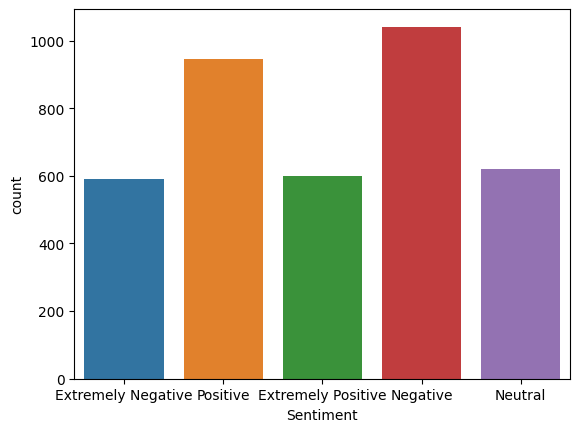

In [55]:
sns.countplot(x = 'Sentiment',data=df)

In [56]:
df['Sentiment'] = df['Sentiment'].map({'Neutral':0,'Positive':1,'Negative':-1,'Extremely Positive':2,'Extremely Negative':-2})
df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,-2
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,1
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,2
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,-1
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,0
...,...,...,...,...,...,...
3793,3794,48746,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,1
3794,3795,48747,"Farmington, NM",16-03-2020,Did you panic buy a lot of non-perishable item...,-1
3795,3796,48748,"Haverford, PA",16-03-2020,Asst Prof of Economics @cconces was on @NBCPhi...,0
3796,3797,48749,NaN,16-03-2020,Gov need to do somethings instead of biar je r...,-2


In [57]:
# Dropping Unneccessary columns that won't help prediction

cols = ['UserName','ScreenName','Location','TweetAt']
df.drop(cols,axis=1, inplace=True)
df

,OriginalTweet,Sentiment
0,TRENDING: New Yorkers encounter empty supermar...,-2
1,When I couldn't find hand sanitizer at Fred Me...,1
2,Find out how you can protect yourself and love...,2
3,#Panic buying hits #NewYork City as anxious sh...,-1
4,#toiletpaper #dunnypaper #coronavirus #coronav...,0
...,...,...
3793,Meanwhile In A Supermarket in Israel -- People...,1
3794,Did you panic buy a lot of non-perishable item...,-1
3795,Asst Prof of Economics @cconces was on @NBCPhi...,0
3796,Gov need to do somethings instead of biar je r...,-2


In [58]:
# Converting the text data into numerical data
tweet = df.OriginalTweet
tweet

0       TRENDING: New Yorkers encounter empty supermar...
1       When I couldn't find hand sanitizer at Fred Me...
2       Find out how you can protect yourself and love...
3       #Panic buying hits #NewYork City as anxious sh...
4       #toiletpaper #dunnypaper #coronavirus #coronav...
                              ...                        
3793    Meanwhile In A Supermarket in Israel -- People...
3794    Did you panic buy a lot of non-perishable item...
3795    Asst Prof of Economics @cconces was on @NBCPhi...
3796    Gov need to do somethings instead of biar je r...
3797    I and @ForestandPaper members are committed to...
Name: OriginalTweet, Length: 3798, dtype: object

In [59]:
# Removing the extra charecters and other for appropriate prediction
tweet = tweet.str.replace('^[a-zA_Z0-9]+',' ')

/tmp/ipykernel_6139/1645976388.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  tweet = tweet.str.replace('^[a-zA_Z0-9]+',' ')


In [65]:
# stemming - removing the tails or identify root word
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('english')
# tokenize - converting to tokens
from nltk import TweetTokenizer
tk = TweetTokenizer()
tweet = tweet.apply(lambda x:[stemmer.stem(i.lower()) for i in tk.tokenize(x)]).apply(lambda x:' '.join(x))